In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_two_classes(X_df, y_df):
    plt.scatter(X_df[y_df == 0]['X1'], X_df[y_df == 0]['X2'], c='blue', label='Class 0', alpha=0.7)
    plt.scatter(X_df[y_df == 1]['X1'], X_df[y_df == 1]['X2'], c='red', label='Class 1', alpha=0.7)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Scatter Plot of Classes')
    plt.legend()
    plt.show()

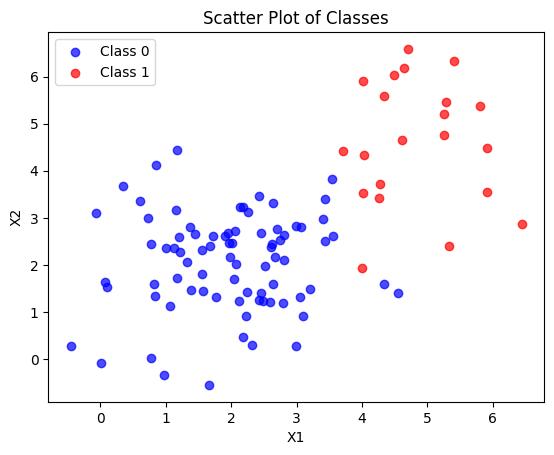

In [ ]:
# Load an imbalanced dataset
df = pd.read_csv('/content/imbalanced - imbalanced.csv')

# Visualize the imbalanced data
# Intuition: By plotting the data, we can observe if one class dominates the feature space.
# Often, minority classes may be hard to distinguish in the plot due to their small size.
plot_two_classes(df[['X1', 'X2']], df['Y'])

## 1 - Oversampling the Minority Class:

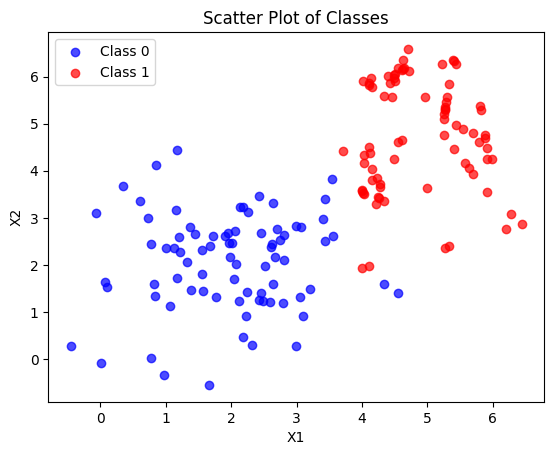

In [ ]:
from imblearn.over_sampling import SMOTE

# Extract features and target variable from the dataset
X = df.drop('Y', axis=1) # Features: X1, X2
y = df['Y'] # Target: Class labels

# Apply SMOTE to resample the data
# Intuition: SMOTE balances the class distribution by adding synthetic points to the minority class.
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize the resampled data
# Intuition: After applying SMOTE, the minority class should be more represented in the plot,
# making the data more balanced and easier for a model to learn from.
plot_two_classes(X_resampled, y_resampled)

## 2 - Undersampling the Majority Class:

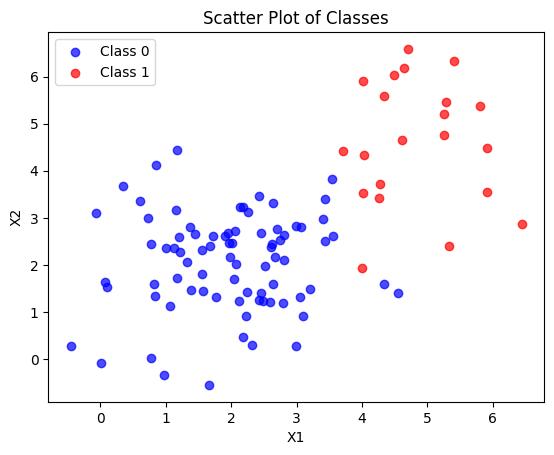

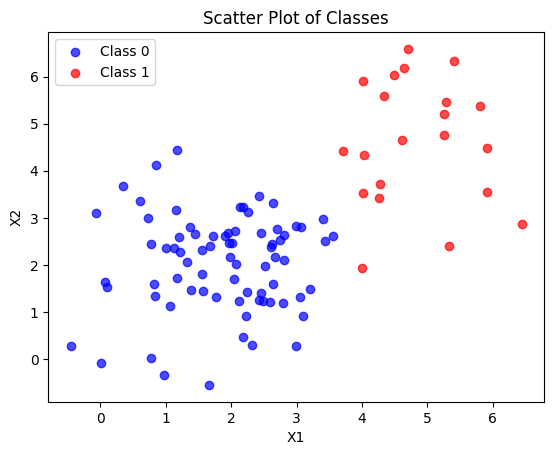

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

# Reload the imbalanced data
df = pd.read_csv('/content/imbalanced - imbalanced.csv')
X = df.drop('Y', axis=1)
y = df['Y']

# Apply ENN to under-sample the data
# Intuition: ENN focuses on "cleaning" the data by removing noisy or redundant majority class examples,
# leaving behind more balanced and cleaner data.
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)

# Visualize the original and resampled data
# Intuition: Before and after applying ENN, we can compare the changes to the class distributions.
# The majority class should become less dominant, creating a more balanced dataset.
plot_two_classes(df[['X1', 'X2']], df['Y'])  # Original imbalanced data
plot_two_classes(X_resampled, y_resampled)   # After ENN under-sampling

## 3 - Combination of Oversampling and Undersampling:

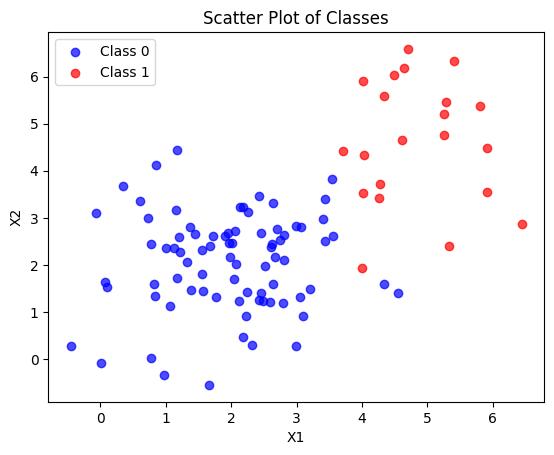

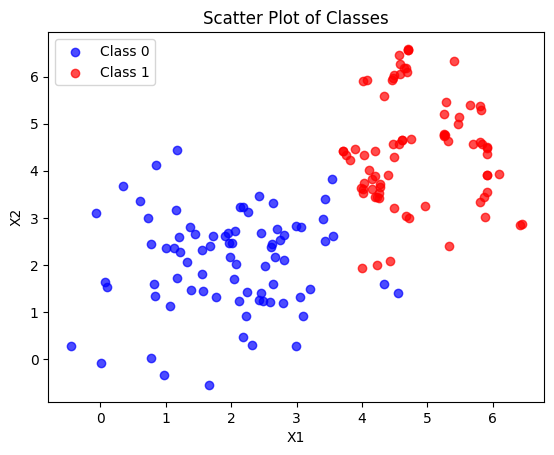

In [ ]:
from imblearn.combine import SMOTETomek

# Reload the imbalanced data
df = pd.read_csv('/content/imbalanced - imbalanced.csv')
X = df.drop('Y', axis=1)
y = df['Y']

# Apply SMOTETomek to resample the data
# Intuition: This approach aims to create a balanced dataset that is free of overlapping examples (Tomek Links)
# while boosting the minority class (SMOTE), resulting in a dataset that is both clean and balanced.
smt = SMOTETomek()
X_resampled, y_resampled = smt.fit_resample(X, y)

# Visualize the original and resampled data
# Intuition: Similar to the previous examples, we visualize the class distributions before and after applying SMOTETomek
# to see how the combination of over-sampling and under-sampling has affected the dataset.
plot_two_classes(df[['X1', 'X2']], df['Y'])  # Original imbalanced data
plot_two_classes(X_resampled, y_resampled)   # After SMOTETomek resampling